In [1]:
import matplotlib.pyplot as plt
import math
import random

In [2]:
# モデルのパラメータ
b0 = 1*10**(-7)
b1 = 1.9*b0
c = 1.4*10
B = 0.1
gamma=150
a0=3
a1=1.75*a0

# 初期値
x = 1*10**8

In [3]:
#decrease parameters
z0 = (c - b0*x)/((b1-b0)*x)
sigma = (B*gamma)/((b1 - b0)*x)
lamda =a0/(B*gamma)

print(z0, gamma, sigma, lamda)

0.44444444444444453 150 1.666666666666667 0.2


In [4]:
#アイソクライン
# 目安
z0=(c/x - b0) / (b1 - b0)
y0 =((1-z0)/z0) *(z0**2+1/gamma) - lamda

print(z0, y0)

0.4444444444444447 0.055246913580246915


In [5]:
#zの幅の設定
dz = 0.01
zEnd = 1
ziEnd = int(zEnd/dz)

yy=4900
zz=0.01

yy_list = [yy]
zz_list = [zz]

for i in range(1,ziEnd):
    zz_new = dz*i
    yy_new =(((1-zz_new)/zz_new) *(zz_new*zz_new+(1/gamma)) )- lamda
    yy = yy_new
    zz = zz_new
    yy_list.append(yy)
    zz_list.append(zz)

yy_list.pop(0)
zz_list.pop(0)
# print(z_list, y_list)

0.01

Text(0, 0.5, 'y')

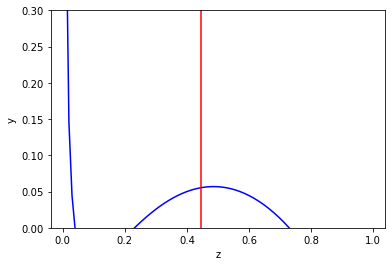

In [6]:
plt.ylim(0,0.3)
plt.plot(zz_list, yy_list, color = "b")
plt.axvline(z0, color = "r")
plt.xlabel("z")
plt.ylabel("y")

In [7]:
# 初期値
# y = random.random()
# z = random.random()
y = 0.02
z = 0.3
t = 0.0

# 時間の設定
dt = 0.01
tEnd = 300
iEnd = int(tEnd/dt)

t_list = [t]
y_list = [y]
z_list = [z]

for i in range(1, iEnd):
    t = dt*i
    y_new = y + dt*(z - z0)*y
    z_new = z + dt*(((1-z)/z) *(z*z+(1/gamma)) - lamda - y)*sigma*z
    y = y_new
    z = z_new

    t_list.append(t)
    y_list.append(y)
    z_list.append(z)

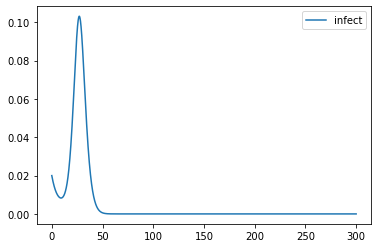

In [8]:
# 時間発展のプロット
plt.plot(t_list, y_list)
plt.legend(["infect"],loc="upper right")

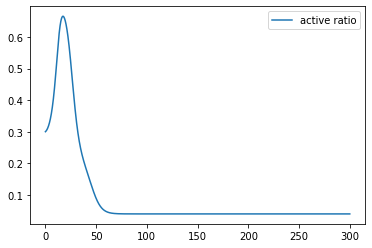

In [9]:
plt.plot(t_list, z_list)
plt.legend(["active ratio"],loc="upper right")

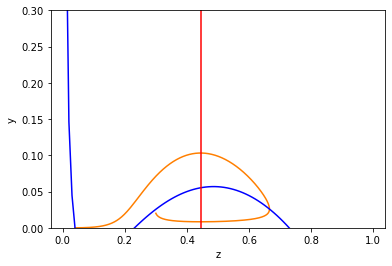

In [10]:
plt.ylim(0,0.3)
# 軌道
plt.plot(z_list, y_list, color='#ff7f00')
# 平衡点
#plt.plot(z0, y2 ,"ko", markersize = 8)
# アイソクライン
plt.plot(zz_list, yy_list, color = "b")
plt.axvline(z0, color = "r")
plt.xlabel("z")
plt.ylabel("y")
plt.savefig("fig2c.png", format="png", dpi=300)